
## Лабораторная работа № 1
## Работу выполнил: Пестов А.А.
## Группа: 18-ИВТ-3
## Вариант: № 6


In [261]:

import pandas as pd
import seaborn as sns
from pandas import concat
from scipy import stats
%matplotlib inline
happiness_df1 = pd.read_csv('2015.csv')
happiness_df2 = pd.read_csv('2016.csv')
happiness_df3 = pd.read_csv('2017.csv')


In [262]:
happiness_df1.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [263]:
happiness_df2.tail()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
152,Benin,Sub-Saharan Africa,153,3.484,3.404,3.564,0.39499,0.10419,0.21028,0.39747,0.06681,0.20180,2.10812
153,Afghanistan,Southern Asia,154,3.360,3.288,3.432,0.38227,0.11037,0.17344,0.16430,0.07112,0.31268,2.14558
154,Togo,Sub-Saharan Africa,155,3.303,3.192,3.414,0.28123,0.00000,0.24811,0.34678,0.11587,0.17517,2.13540
155,Syria,Middle East and Northern Africa,156,3.069,2.936,3.202,0.74719,0.14866,0.62994,0.06912,0.17233,0.48397,0.81789
156,Burundi,Sub-Saharan Africa,157,2.905,2.732,3.078,0.06831,0.23442,0.15747,0.04320,0.09419,0.20290,2.10404


In [264]:
happiness_df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        155 non-null    object 
 1   Happiness.Rank                 155 non-null    int64  
 2   Happiness.Score                155 non-null    float64
 3   Whisker.high                   155 non-null    float64
 4   Whisker.low                    155 non-null    float64
 5   Economy..GDP.per.Capita.       155 non-null    float64
 6   Family                         155 non-null    float64
 7   Health..Life.Expectancy.       155 non-null    float64
 8   Freedom                        155 non-null    float64
 9   Generosity                     155 non-null    float64
 10  Trust..Government.Corruption.  155 non-null    float64
 11  Dystopia.Residual              155 non-null    float64
dtypes: float64(10), int64(1), object(1)
memory usage: 

In [265]:
happiness_df1.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [266]:
happiness_df2.shape

(157, 13)

# 1 Визуализируйте корреляции между признаками, находящимися в наборе данных (heatmap). Сделайте выводы.

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,1.000000,-0.992105,0.158516,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142,-0.521999
Happiness Score,-0.992105,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,0.158516,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),-0.785267,0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,-0.733644,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117


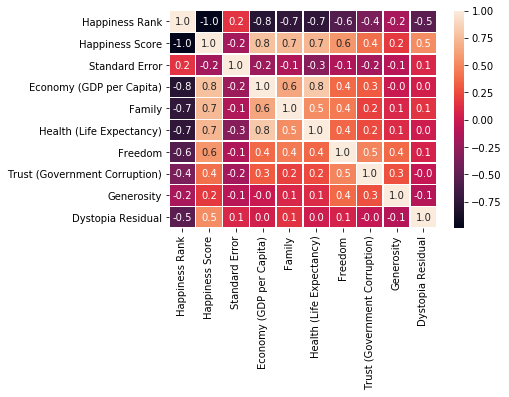

In [267]:
sns.heatmap(happiness_df1.corr(), annot = True, fmt =".1f", linewidths=.5)
happiness_df1.corr().head()


# 2. Постройте график счастья по регионам, страны на графике должны представляться отдельными точками.

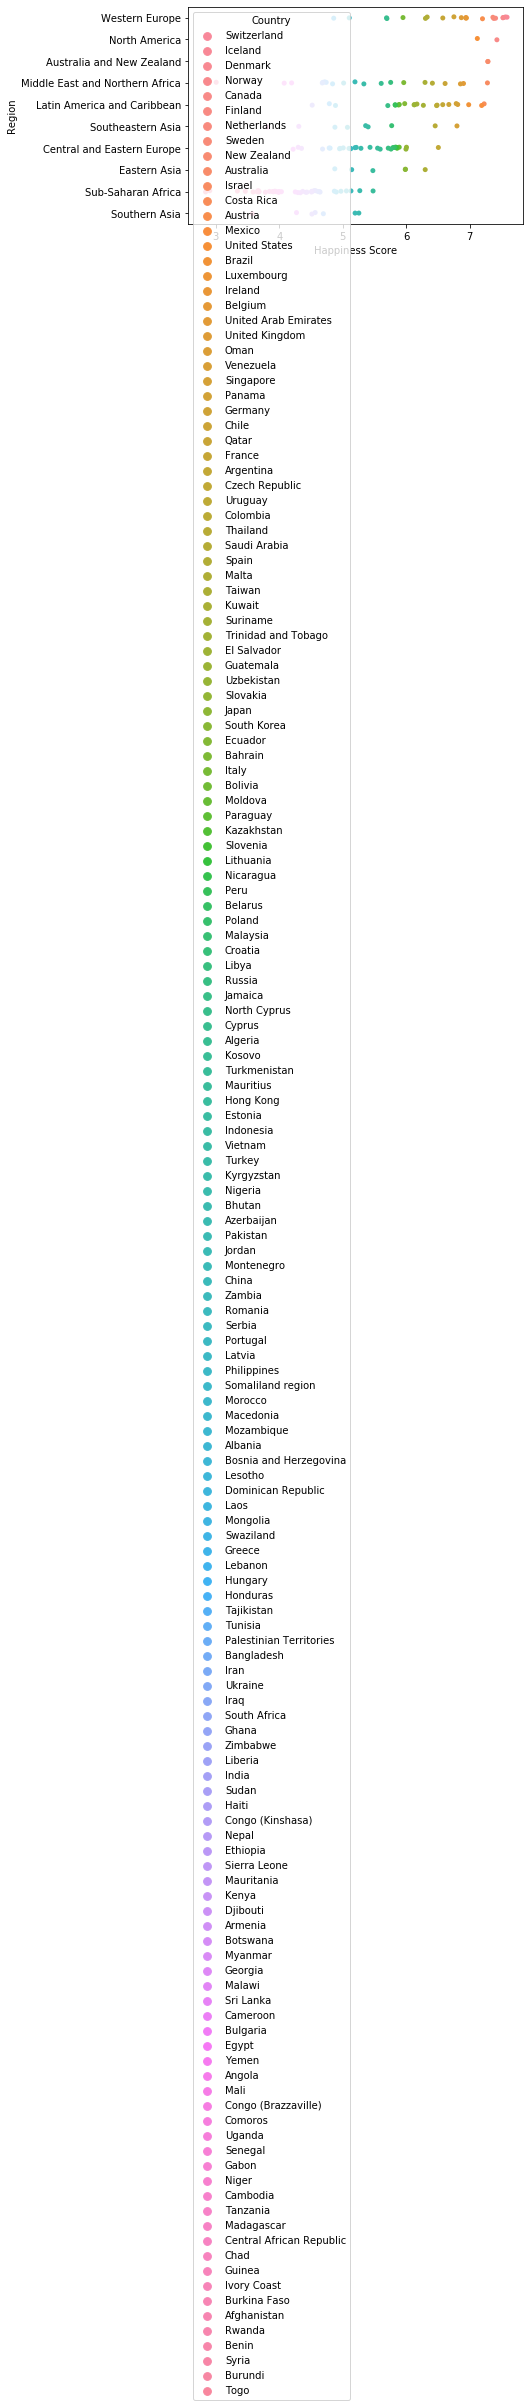

In [268]:

ax = sns.stripplot(x="Happiness Score", y="Region", hue = "Country", data=happiness_df1, jitter=0.05)

# 3. Оцените количество счастья по годам по регионам.

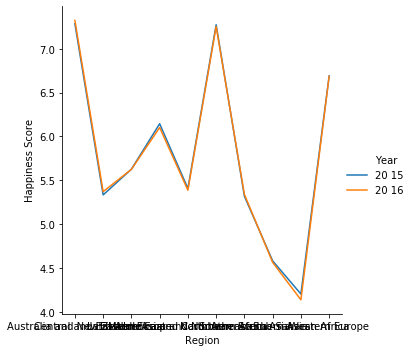

In [269]:

happiness_df1["Year"] = "20 15"
happiness_df2["Year"] = "20 16"
happiness_df3["Year"] = "20 17"
df1_df2= concat([happiness_df1,happiness_df2])
g = sns.relplot(x="Region", y="Happiness Score", ci=None,
            dashes=False, markers=True, kind="line", hue = "Year", data=df1_df2)

### Из графика видно, что количество счастья в регионах изменяется незначительно

# 4. Определите наиболее сильно изменяющиеся параметры по разным странам в разные годы.

In [270]:

happiness_df1["Year"] = "2015"
happiness_df2["Year"] = "2016"
happiness_df3["Year"] = "2017"
happiness_df3.rename(columns = {"Happiness.Rank" : "Happiness Rank", "Happiness.Score" : "Happiness Score", "Whisker.high" : "Whisker high", "Whisker.low" : "Whisker low", "Economy..GDP.per.Capita." : "Economy (GDP per Capita)", "Trust..Government.Corruption." : "Trust (Government Corruption)", "Dystopia.Residual" : "Dystopia Residual", "Health..Life.Expectancy." : "Health (Life Expectancy)"}, inplace=True)
means_df = concat([happiness_df1, happiness_df2])
means_df = concat([means_df, happiness_df3])
means_df = means_df.drop(['Happiness Rank'], axis = 'columns')
means_df = means_df.groupby("Year").mean()
maximum_df = means_df.max()
minimum_df = means_df.min()
result = maximum_df - minimum_df
result = result.sort_values(ascending=False)
print(means_df)
print("Наиболее изменяющиеся параметры: ")
print(result)

      Happiness Score  Standard Error  Economy (GDP per Capita)    Family  \
Year                                                                        
2015         5.375734        0.047885                  0.846137  0.991046   
2016         5.382185             NaN                  0.953880  0.793621   
2017         5.354019             NaN                  0.984718  1.188898   

      Health (Life Expectancy)   Freedom  Trust (Government Corruption)  \
Year                                                                      
2015                  0.630259  0.428615                       0.143422   
2016                  0.557619  0.370994                       0.137624   
2017                  0.551341  0.408786                       0.123120   

      Generosity  Dystopia Residual  Lower Confidence Interval  \
Year                                                             
2015    0.237296           2.098977                        NaN   
2016    0.242635           2.325807     

# 5. Определите страны, появляющиеся и исчезающие в рейтинге стран.

In [271]:

df1 = pd.read_csv('2015.csv', header=None)
df2 = pd.read_csv('2016.csv', header=None)
df3 = pd.read_csv('2017.csv', header=None)
df1.drop([1,2,3,4,5,6,7,8,9,10,11] , axis = 1,  inplace = True)
df2.drop([1,2,3,4,5,6,7,8,9,10,11,12] , axis = 1,  inplace = True)
df3.drop([1,2,3,4,5,6,7,8,9,10,11], axis = 1,  inplace = True)
result1 = concat([df1,df2]).drop_duplicates(keep=False)
result2 = concat([df1,df3]).drop_duplicates(keep=False)
result3 = concat([df2,df3]).drop_duplicates(keep=False)
print('Вышедшие/Вошедние 2015/2016', result1)
print('Вышедшие/Вошедние 2015/2017', result2)
print('Вышедшие/Вошедние 2016/2017', result3)

Вышедшие/Вошедние 2015/2016                             0
22                       Oman
91          Somaliland region
94                 Mozambique
97                    Lesotho
101                 Swaziland
126                  Djibouti
148  Central African Republic
15                Puerto Rico
52                     Belize
76                    Somalia
97          Somaliland Region
113                   Namibia
143               South Sudan
Вышедшие/Вошедние 2015/2017                             0
22                       Oman
38                     Taiwan
40                   Suriname
72                  Hong Kong
91          Somaliland region
99                       Laos
101                 Swaziland
126                  Djibouti
140                   Comoros
33   Taiwan Province of China
50                     Belize
71    Hong Kong S.A.R., China
93                    Somalia
111                   Namibia
147               South Sudan
Вышедшие/Вошедние 2016/2017                 

# 6. Удалите строки с пропущенными значениями. Выведите размер набора данных до и после удаления.

In [272]:

count_rows_before = len(happiness_df1) + len(happiness_df2) + len(happiness_df3)
happiness_df1 = happiness_df1.dropna()
happiness_df2 = happiness_df2.dropna()
happiness_df3 = happiness_df3.dropna()
count_rows_after = len(happiness_df1) + len(happiness_df2) + len(happiness_df3)
print("Количество строк данных до удаления: ", count_rows_before)
print("Количество строк данных после удаления: ", count_rows_after)


Количество строк данных до удаления:  470
Количество строк данных после удаления:  470


# 7. Вычислите корреляцию Пирсона и Спирмена между признаками Trust.Government.Corruption и Family. Сравните полученные величины корреляции. Постройте гистограммы для указанных признаков. Оцените значение p-value.

(0.205605111871804, 0.009551833256262169)
SpearmanrResult(correlation=0.18459942329799503, pvalue=0.020235828494205098)
Приемлимое значение p-value


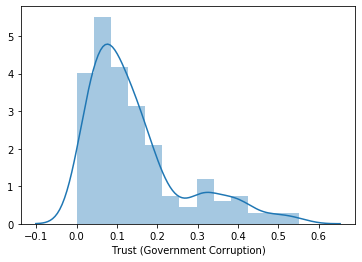

In [273]:
#7. Вычислите корреляцию Пирсона и Спирмена между признаками Trust.Government.Corruption и Family. Сравните полученные величины корреляции. Постройте гистограммы для указанных признаков. Оцените значение p-value.
print(stats.pearsonr(happiness_df1['Trust (Government Corruption)'], happiness_df1['Family']))
print(stats.spearmanr(happiness_df1['Trust (Government Corruption)'], happiness_df1['Family']))
sns.distplot(happiness_df1['Trust (Government Corruption)'])
if stats.spearmanr(happiness_df1['Trust (Government Corruption)'], happiness_df1['Family'])[1] < 0.05:
    print('Приемлимое значение p-value')
else:
    print('Не приемлимое значение p-value')

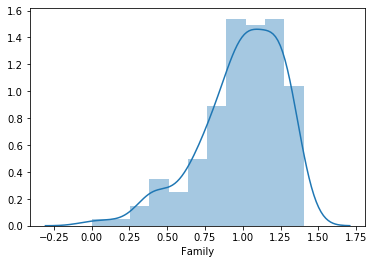

In [274]:
sns.distplot(happiness_df1['Family'])


# 8. Добавьте в набор данных признак, являющийся суммой двух других признаков.

In [276]:

happiness_df1["Sum"]=happiness_df1["Happiness Score"] + happiness_df1["Health (Life Expectancy)"]
happiness_df2["Sum"]=happiness_df2["Happiness Score"] + happiness_df2["Health (Life Expectancy)"]
happiness_df1.head(5)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year,Sum
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015,8.52843
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015,8.50884
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015,8.40164
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015,8.40721
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015,8.33263


In [277]:
happiness_df2.head(5)

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year,Sum
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939,2016,8.32104
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463,2016,8.37203
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137,2016,8.36833
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465,2016,8.29379
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596,2016,8.22391
